# Init Phase

In this notebook we will look at a highly imbalanced binary classification problem, specifically our target variable as the depressed option on the ksad.

In [1]:
from ABCD_ML import ABCD_ML
import warnings
import os

warnings.filterwarnings("ignore") # mutes warnings

Using TensorFlow backend.


In [2]:
# Defining locations of files we will use
nda_dr = '/mnt/sdb2/ABCD2p0NDA/'
nda_dr2 = '/mnt/sdb2/ABCDFixRelease2p0p1/'

map_file = os.path.join(nda_dr2, 'Fix Release Notes 2.0.1_Public', '24. ABCD_Release_2.0.1_Updates',
                        'abcd_2.0.1_mapping.csv')

data1 = os.path.join(nda_dr2, 'abcd_ddtidp101.txt')
data2 = os.path.join(nda_dr2, 'abcd_ddtidp201.txt')

covar1 = os.path.join(nda_dr, 'abcd_mri01.txt')
covar2 = os.path.join(nda_dr, 'acspsw03.txt')

target1 = os.path.join(nda_dr, 'abcd_ksad01.txt')

In [3]:
ML = ABCD_ML(exp_name = 'ksad_depression',
             existing_log = 'overwrite',
             random_state = 1)

exp_name = ksad_depression
log_dr = /home/sage/ABCD_ML/Examples
existing_log = overwrite
verbose = True
exp log dr setup at: /home/sage/ABCD_ML/Examples/ksad_depression
log file at: /home/sage/ABCD_ML/Examples/ksad_depression/logs.txt
notebook = True
use_default_subject_ids = False
low memory mode = False
strat_u_name = _Strat
random state = 1


ABCD_ML object initialized


# Loading Phase

In [4]:
ML.Set_Default_Load_Params(dataset_type='basic',
                           subject_id='src_subject_id',
                           eventname='baseline_year_1_arm_1',
                           overlap_subjects=False,
                           na_values=['777', '999'],
                           drop_na=True,
                           drop_or_na='drop')

No default eventname_col passed, set to "eventname"
Default load params set within self.default_load_params.



We will use the deap name instead of NDA default name

In [5]:
ML.Load_Name_Map(loc = map_file,
                 dataset_type = 'explorer',
                 source_name_col = 'nda_name',
                 target_name_col = 'deap_name')

Loading /mnt/sdb2/ABCDFixRelease2p0p1/Fix Release Notes 2.0.1_Public/24. ABCD_Release_2.0.1_Updates/abcd_2.0.1_mapping.csv  with dataset type: explorer
Loading new name_map from file!


Loading DTI data

In [6]:
ML.Load_Data(loc = [data1, data2],
             filter_outlier_std = 10,
             drop_na = False,
             clear_existing=True)

Cleared loaded data.

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_ddtidp101.txt  with dataset type: basic
dropped ['collection_id', 'abcd_ddtidp101_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_ddtidp201.txt  with dataset type: basic
dropped ['collection_id', 'abcd_ddtidp201_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Dropped 0 cols for all missing values
Loaded rows with NaN remaining: 669
Dropped 537 rows based on filter input params, e.g. filter outlier percent, drop cat, ect...

Loaded NaN Info:
There are: 1189116 total missing values
24 columns found with 660 missing values (column name overlap: ['_cort.destrieux_', 'dmri_dti.', 'al.', 'or'])
16 columns found with 662 missing values (column name overlap: ['_cort.destrie

In [7]:
ML.Show_Data_Dist(plot_type='hist')

Set to overlapping loaded subjects.


Next we will load in our target variables.

- 'ksads_1_2_p' - Symptom - Depressed Mood Past

- 'ksads_1_842_p' - Diagnosis - Major Depressive Disorder Past (F32.9)

In [8]:
ML.Load_Targets(loc = target1,
                col_name = ['ksads_1_842_p', 'ksads_1_2_p'],
                data_type = ['binary', 'binary'])

Loading /mnt/sdb2/ABCD2p0NDA/abcd_ksad01.txt  with dataset type: basic
4949 subjects have been dropped based on passed eventname params.
Dropped 0 cols for all missing values
Dropped 151 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0

loading: ksads_1_842_p
loading: ksads_1_2_p

Final shape:  (11710, 2)

Total valid overlapping subjects = 10709

All loaded targets
0 : ksads_1_842_p
1 : ksads_1_2_p



Set to overlapping loaded subjects.
-- ksads_1_842_p --


,Original Name,Counts,Frequency
Internal Name,,,
0,0.0,10436,0.974507
1,1.0,273,0.025493


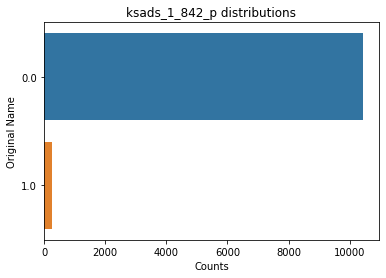


-- ksads_1_2_p --


,Original Name,Counts,Frequency
Internal Name,,,
0,0.0,9890,0.923522
1,1.0,819,0.076478


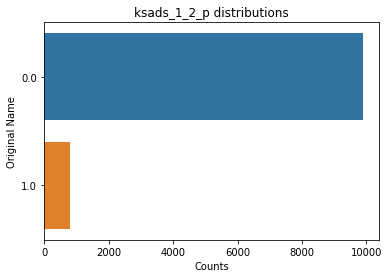

In [9]:
ML.Show_Targets_Dist()

A very skewed distribution for both, but a bit more severe with the past major depressive, vs past depressive mood.

We will load in some co-variates next.

In [10]:
ML.Load_Covars(loc = data1,
               col_name = ['interview_age', 'sex'],
               data_type = ['f', 'b'],
               clear_existing=True)

ML.Load_Covars(loc = covar1,
               col_name = 'mri_info_manufacturer',
               data_type = 'c',
               code_categorical_as='dummy')

ML.Load_Covars(loc = covar2,
               col_name = 'race_ethnicity',
               data_type = 'c',
               code_categorical_as='dummy')

cleared covars.

Loading /mnt/sdb2/ABCDFixRelease2p0p1/abcd_ddtidp101.txt  with dataset type: basic
Dropped 0 cols for all missing values
Dropped 1 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0
loading: interview_age
loading: sex
loaded shape:  (11399, 2)

Total valid overlapping subjects = 10708

Loading /mnt/sdb2/ABCD2p0NDA/abcd_mri01.txt  with dataset type: basic
Dropped 0 cols for all missing values
Dropped 0 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0
loading: mri_info_manufacturer
Found 3 categories
dummy coding by dropping col mri_info_manufacturer_2
loaded shape:  (11755, 2)
Merged with existing!
New combined shape: (11398, 4)

Total valid overlapping subjects = 10707

Loading /mnt/sdb2/ABCD2p0NDA/acspsw03.txt  with dataset type: basic
Dropped 0 cols for all missing values
Dropped 18 rows for missing values, based on t

Set to overlapping loaded subjects.
-- interview_age --


,interview_age
count,10691.000000
mean,118.911140
std,7.511224
min,107.000000
25%,112.000000
50%,119.000000
75%,125.000000
max,132.000000


Num. of unique vals: 26



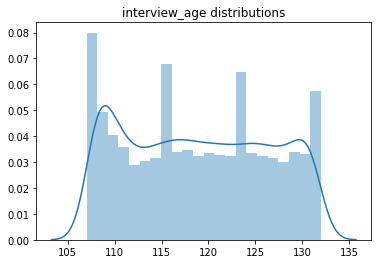


-- sex --


,Original Name,Counts,Frequency
Internal Name,,,
0,F,5069,0.474137
1,M,5622,0.525863


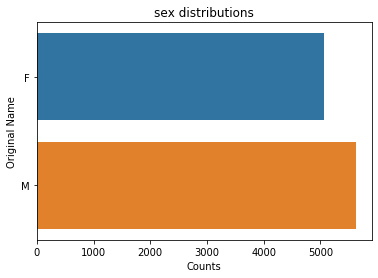


-- mri_info_manufacturer --


,Original Name,Counts,Frequency
Internal Name,,,
mri_info_manufacturer_0,GE MEDICAL SYSTEMS,2576.0,0.240950
mri_info_manufacturer_1,Philips Medical Systems,1337.0,0.125058
mri_info_manufacturer_2,SIEMENS,6778.0,0.633991


Note: mri_info_manufacturer_2 was dropped due to dummy coding but is still shown.


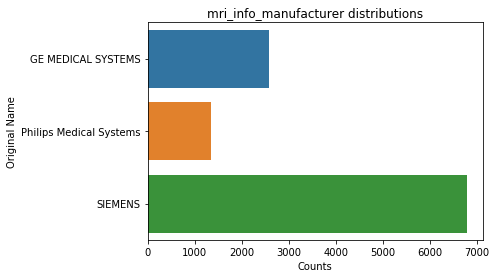


-- race_ethnicity --


,Original Name,Counts,Frequency
Internal Name,,,
race_ethnicity_0,1.0,5670.0,0.530353
race_ethnicity_1,2.0,1540.0,0.144046
race_ethnicity_2,3.0,2144.0,0.200543
race_ethnicity_3,4.0,213.0,0.019923
race_ethnicity_4,5.0,1124.0,0.105135


Note: race_ethnicity_0 was dropped due to dummy coding but is still shown.


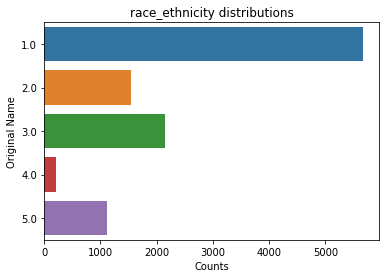

In [11]:
ML.Show_Covars_Dist()

We could load extra stratification value with Load_Strat here if we wanted special validation behavior for example, in this case, we dont as we have such skewed distributions.

# Validation Phase

A reasonable validation strategy given such skewed target distributions is stratify by the target variable directy (in this case an overlap over both of interest)

In [12]:
ML.Define_Validation_Strategy(stratify= ['ksads_1_842_p', 'ksads_1_2_p'])


Total valid overlapping subjects = 10691
Removing non overlapping subjects from loaded data, covars, ect...

CV defined with stratifying behavior over 4 unique values.


,ksads_1_842_p,ksads_1_2_p,Counts
0,0.0,0.0,9789
1,0.0,1.0,630
2,1.0,0.0,86
3,1.0,1.0,186


The smallest defined group contains only 86 subjects. This means that group could get a pretty small representation within nested CV, but it *should* be okay.

Next we define a global train test split, which will take into account our defined validation strategy. 

In [13]:
ML.Train_Test_Split(test_size=.2)

Preparing final data, in self.all_data
Any changes to loaded data, covars or strat will not be included, from now on.

Final data (w/ target) for modeling loaded shape: (10691, 1822)
Performing split on 10691 subjects!
Test split size: 0.2

Performed train test split!
Train size: 8552
Test size:  2139


# Modeling Phase

We first begin by setting any default parameters we know that we will not change much.

In [ ]:
#ML.Set_Default_ML_Params?

In [ ]:
ML.Set_Default_ML_Params(problem_type = 'binary',
                         target = 0, # We will start of with major depressive
                         metric = ['roc auc', 'matthews', 'f1'], # Range of good binary metrics
                         scaler = 'standard',
                         splits = 3,
                         n_repeats = 2,
                         search_type = 'RandomSearch',
                         search_splits = 3,
                         search_n_iter = 20,
                         n_jobs = 8)

To see what binary models are avaliable we can call 
"ML.Show_Models(problem_type='binary')" 

or 

They can also be seen (in perhaps a more visually appealing way) at: https://abcd-ml.readthedocs.io/en/latest/options.html#binary

Below will simply explore running some different combinations of models

In [ ]:
raw_scores, raw_preds = ML.Evaluate(model = 'ridge',
                                    model_params = 1)

In [ ]:
ep = {'balanced bagging': {'n_estimators': 20}}
raw_scores, raw_preds = ML.Evaluate(model = 'ridge',
                                    model_params = 1,
                                    ensemble = 'balanced bagging',
                                    ensemble_params = 0,
                                    extra_params = ep)

In [ ]:
ep = {'balanced bagging': {'n_estimators': 20}}
raw_scores, raw_preds = ML.Evaluate(model = 'light gbm',
                                    model_params = 1,
                                    ensemble = 'balanced bagging',
                                    ensemble_params = 0,
                                    extra_params = ep)

In [ ]:
raw_scores = ML.Evaluate(model = 'svm classifier',
                         model_params = 1,
                         feat_selector = 'univariate selection')

In [ ]:
raw_scores = ML.Evaluate(model = 'light gbm',
                         model_params = 1,
                         feat_selector = 'univariate selection')

Note the negative matthews corr coef. this is pretty bad.

In [ ]:
raw_scores = ML.Evaluate(model = 'elastic net',
                         model_params = 1,
                         feat_selector = 'univariate selection')

Lets see if we get any better results using the second target we defined.

In [ ]:
ML.Set_Default_ML_Params(target = 1)

In [ ]:
raw_scores, raw_preds = ML.Evaluate(model = 'ridge',
                                    model_params = 1)